# Problem set 3

Camellia Haghverdian

Loan Repayments and State Grants

03/06/2024

## 1. Develop hypotheses about two non-linear relationships [1 pt]

You can use the GSS data, Student aid data, or your own data. Develop at least 2 hypotheses about non-linear relationships in your dataset of choice that do the following:

    A. Use the form: The DV will change positive/negatively if the IV changes positively/negatively/categorically (specify what the variables measure and what the categories are if you have a categorical hypothesis)
    
    H1: The amount of low income loan repayment (DV) changes negatively if the amount of state grant to low-income studens (IV) changes positively. In other words, if the amount of state grant to low-income studens (IV) increases, the amount of loan low income (DV) students should repay decreases. 

    B. State if you expect each hypothesized relationship will be linear or take one of the 5 non-linear forms (1. nominal, 2. sequential dummies, 3. splines, 4. quadratic, 5. logarithmic). You tell us at least two different non-linear forms that you think your hypothesized relationships will or will not take.
    
    H1: I think the hypothesis mentioned above will take the form of a spline; specifically, a linear and piecewise cubic spline.
    

    C. State your explanation why (theory) you make the predictions in A. and B.
    
    - Because the more grant the state provides, the overall amount of loan a low income student must pay back will be less.

    D. Tell us the source of your data and describe its sample.
    
    - Source: Loan Repayment data in 2013
    - Sample: Students in various colleges and universities in the US

## 2. Conduct statistical tests for your hypothesized relationship: [3 pts]

* Estimate at least 2 different types of non-linear models that test your hypotheses.

* Use appropriate regression and graphical representations to represent each model.

* Use esttab to compare between types of non-linear and linear models

In [1]:
qui log using week7_log.log, replace

In [2]:
insheet using "/Users/camellia/Documents/Stats 2/soc211_assignments/Week 7/loanrepay2013_highestresearch.csv", clear

(19 vars, 33 obs)


In [3]:
ds

opeid         instnm        all_under     sgrnt_low_~c  xstring
acceptrate    stabbr        netprice4l~e  igrnt_low_~c  ystring
y_lo_inc_rpy  hgroup        spend_ugd_~w  sandigrnt_~c  markerlabel
lo_inc_deb~n  upgrntn       x_aid_byst~r  instatetui~n


In [4]:
codebook y_lo_inc_rpy sgrnt_low_~c 


-------------------------------------------------------------------------------
y_lo_inc_rpy                                                       Y_lo_inc_rpy
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [47.9304,78.4337]             Units: .0001
         Unique values: 33                        Missing .: 0/33

                  Mean: 66.2211
             Std. dev.: 8.30001

           Percentiles:     10%       25%       50%       75%       90%
                        56.1845   60.4167   67.2012   73.6202   75.6098

-------------------------------------------------------------------------------
sgrnt_low_inc                                                       (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [438.66541,31988.313]         Units: .00001
         Unique values:

In [5]:
label variable y_lo_inc_rpy "Loan Repayment Percent"
label variable sgrnt_low_~c "State Grant Low Income"
codebook y_lo_inc_rpy sgrnt_low_~c


-------------------------------------------------------------------------------
y_lo_inc_rpy                                             Loan Repayment Percent
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [47.9304,78.4337]             Units: .0001
         Unique values: 33                        Missing .: 0/33

                  Mean: 66.2211
             Std. dev.: 8.30001

           Percentiles:     10%       25%       50%       75%       90%
                        56.1845   60.4167   67.2012   73.6202   75.6098

-------------------------------------------------------------------------------
sgrnt_low_inc                                            State Grant Low Income
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [438.66541,31988.313]         Units: .00001
         Unique values:

In [6]:
sum  sgrnt_low_~c y_lo_inc_rpy  


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
sgrnt_low_~c |         33    5975.703    5837.969   438.6654   31988.31
y_lo_inc_rpy |         33    66.22106     8.30001    47.9304    78.4337


In [7]:
xtile stategrantquant = sgrnt_low_inc, nq(5)

In [8]:
sum sgrnt_low_inc, detail
tab stategrantquant


                   State Grant Low Income
-------------------------------------------------------------
      Percentiles      Smallest
 1%     438.6654       438.6654
 5%     602.3331       602.3331
10%     714.6354       656.8206       Obs                  33
25%     1529.607       714.6354       Sum of wgt.          33

50%     5026.689                      Mean           5975.703
                        Largest       Std. dev.      5837.969
75%     8263.273       10553.27
90%     10553.27       10871.33       Variance       3.41e+07
95%     11045.71       11045.71       Skewness       2.690303
99%     31988.31       31988.31       Kurtosis       12.95795

5 quantiles |
         of |
sgrnt_low_i |
         nc |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |          7       21.21       21.21
          2 |          7       21.21       42.42
          3 |          6       18.18       60.61
          4 |          7       21.21       8

In [9]:
%head y_lo_inc_rpy sgrnt_low_inc stategrantquant

,y_lo_inc_rpy,sgrnt_low_inc,stategrantquant
1,57.2512,438.6654,1
2,74.3373,9742.227,5
3,78.4337,10214.98,5
4,73.6202,11045.71,5
5,72.9519,9523.463,4


In [10]:
sum sgrnt_low_inc if stategrantquant==5


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
sgrnt_low_~c |          6    14069.31    8790.926   9742.227   31988.31


# Basic Linear Regression

In [11]:
eststo: reg y_lo_inc_rpy sgrnt_low_inc


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =     11.56
       Model |  598.734324         1  598.734324   Prob > F        =    0.0019
    Residual |  1605.75096        31   51.798418   R-squared       =    0.2716
-------------+----------------------------------   Adj R-squared   =    0.2481
       Total |  2204.48528        32  68.8901651   Root MSE        =    7.1971

------------------------------------------------------------------------------
y_lo_inc_rpy | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
sgrnt_low_~c |   .0007409   .0002179     3.40   0.002     .0002965    .0011854
       _cons |   61.79345   1.807105    34.19   0.000     58.10783    65.47906
------------------------------------------------------------------------------
(est1 stored)


(bin=5, start=438.66541, width=2726.1288)
(bin=5, start=0, width=3583.8004)


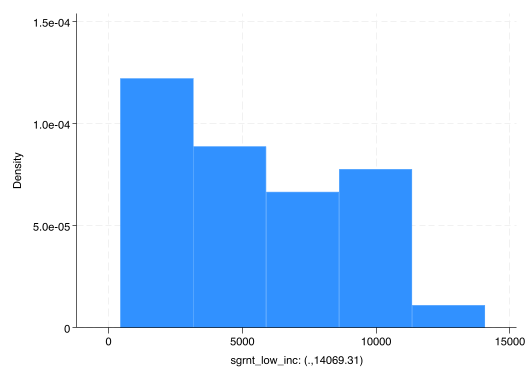

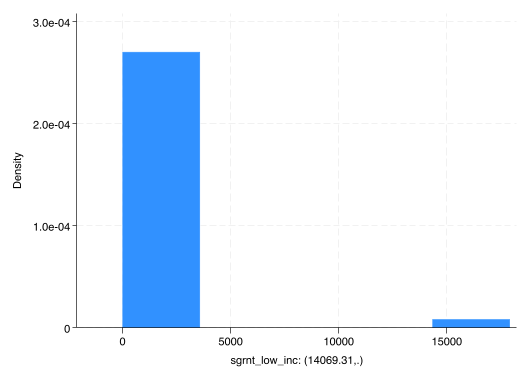

In [12]:
mkspline stategrant1 14069.31 stategrant2 = sgrnt_low_inc

histogram stategrant1, name(hist1)
histogram stategrant2, name(hist2)


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(2, 30)        =      9.94
       Model |   878.49794         2   439.24897   Prob > F        =    0.0005
    Residual |  1325.98734        30  44.1995781   R-squared       =    0.3985
-------------+----------------------------------   Adj R-squared   =    0.3584
       Total |  2204.48528        32  68.8901651   Root MSE        =    6.6483

------------------------------------------------------------------------------
y_lo_inc_rpy | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 stategrant1 |    .001416   .0003354     4.22   0.000     .0007309     .002101
 stategrant2 |  -.0001635    .000412    -0.40   0.694    -.0010049     .000678
       _cons |   58.61725   2.092937    28.01   0.000     54.34291     62.8916
--------------------------------------------------

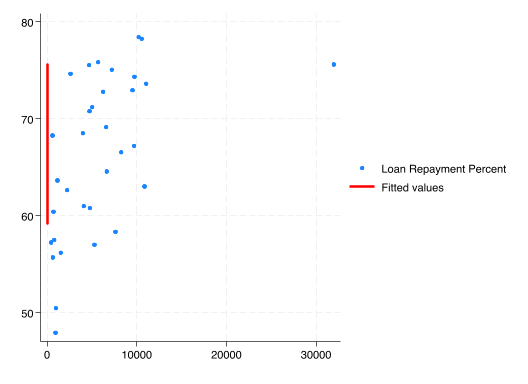

In [13]:
eststo: reg y_lo_inc_rpy stategrant1 stategrant2
predict yhat

tw (scatter y_lo_inc_rpy sgrnt_low_inc) (line yhat y_lo_inc_rpy, sort color(red) lwidth(thick))

In [14]:
esttab


--------------------------------------------
                      (1)             (2)   
             y_lo_inc_rpy    y_lo_inc_rpy   
--------------------------------------------
sgrnt_low_~c     0.000741**                 
                   (3.40)                   

stategrant1                       0.00142***
                                   (4.22)   

stategrant2                     -0.000163   
                                  (-0.40)   

_cons               61.79***        58.62***
                  (34.19)         (28.01)   
--------------------------------------------
N                      33              33   
--------------------------------------------
t statistics in parentheses
* p<0.05, ** p<0.01, *** p<0.001


# Making a Piecwise Cubic Spline

In [15]:
mkspline stategrant1 = y_lo_inc_rpy, cubic displayknots


             |     knot1      knot2      knot3      knot4      knot5 
-------------+-------------------------------------------------------
y_lo_inc_rpy |   57.0114   60.55138    67.2012   73.38629    75.5474 


In [16]:
eststo: reg y_lo_inc_rpy sgrnt_low_inc


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =     11.56
       Model |  598.734324         1  598.734324   Prob > F        =    0.0019
    Residual |  1605.75096        31   51.798418   R-squared       =    0.2716
-------------+----------------------------------   Adj R-squared   =    0.2481
       Total |  2204.48528        32  68.8901651   Root MSE        =    7.1971

------------------------------------------------------------------------------
y_lo_inc_rpy | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
sgrnt_low_~c |   .0007409   .0002179     3.40   0.002     .0002965    .0011854
       _cons |   61.79345   1.807105    34.19   0.000     58.10783    65.47906
------------------------------------------------------------------------------
(est3 stored)


In [17]:
predict yhat2

(option xb assumed; fitted values)


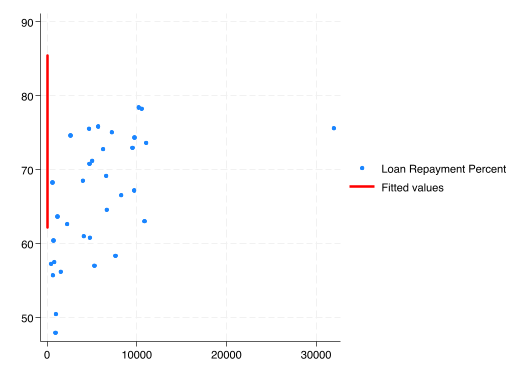

In [18]:
tw (scatter y_lo_inc_rpy sgrnt_low_inc) (line yhat2 y_lo_inc_rpy, sort color(red) lwidth(thick))

In [19]:
esttab


------------------------------------------------------------
                      (1)             (2)             (3)   
             y_lo_inc_rpy    y_lo_inc_rpy    y_lo_inc_rpy   
------------------------------------------------------------
sgrnt_low_~c     0.000741**                      0.000741** 
                   (3.40)                          (3.40)   

stategrant1                       0.00142***                
                                   (4.22)                   

stategrant2                     -0.000163                   
                                  (-0.40)                   

_cons               61.79***        58.62***        61.79***
                  (34.19)         (28.01)         (34.19)   
------------------------------------------------------------
N                      33              33              33   
------------------------------------------------------------
t statistics in parentheses
* p<0.05, ** p<0.01, *** p<0.001


In [20]:
esttab, stats(r2 N, labels("R-Aquared" "N")) cells(b(star fmt(3)) ///
se(fm(3) par)) nobase


------------------------------------------------------------
                      (1)             (2)             (3)   
             y_lo_inc_rpy    y_lo_inc_rpy    y_lo_inc_rpy   
                     b/se            b/se            b/se   
------------------------------------------------------------
sgrnt_low_~c        0.001**                         0.001** 
                  (0.000)                         (0.000)   
stategrant1                         0.001***                
                                  (0.000)                   
stategrant2                        -0.000                   
                                  (0.000)                   
_cons              61.793***       58.617***       61.793***
                  (1.807)         (2.093)         (1.807)   
------------------------------------------------------------
R-Aquared           0.272           0.399           0.272   
N                  33.000          33.000          33.000   
-----------------------

In [21]:
log close

      name:  <unnamed>
       log:  /Users/camellia/Documents/Stats 2/soc211_assignments/Week 7/week7_
> log.log
  log type:  text
 closed on:   6 Mar 2024, 15:38:00
-------------------------------------------------------------------------------


## 3. Interpret the results [1 pt]

    A. Say whether the results support or contradict your hypothesis and why
    
    B. Say whether a linear or particular non-linear model best describes your data and why

A. The two spline models (1. linear spline 2. piecewise cubic spline) are not good representations of my
hypothesis mentioned at the beginning of this assignment.

B. The basic linear regression model better describes my data since the P value in the linear regression
model is 0.002, which is significant, while the basic linear regression and oiecewise cubic spline have similar
R-squared and P value, the basic cubic spline suffers from overfitting.